# Project 1: Data Manipulation, Handling Missing Data, Data Visualization **bold text**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the dataset file, 'titanic.csv' from the following link:

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv")

2. Find out all the feature names where Null values exist.

In [ ]:
null_columns = df.columns[df.isnull().any()].tolist()
print("Columns with Null values:", null_columns)

Columns with Null values: ['Age', 'Cabin', 'Embarked']


3. Fill the null values of the 'Age' column with the mean of the other values.
And also fill the Null values of the 'Cabin' column with 'Unknown'.

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

<ipython-input-6-3fb08aba9290>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


4. Plot the dataset with 2 bars; Survived, Dead.
And include Female and Male survivors' measurement in each bar

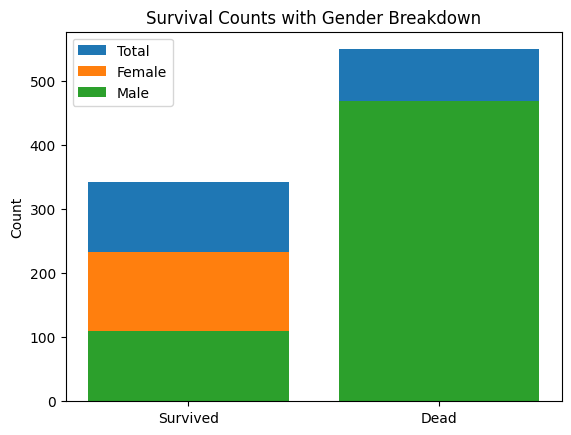

In [ ]:
survived = df[df['Survived'] == 1]
dead = df[df['Survived'] == 0]

survived_counts = survived['Sex'].value_counts()
dead_counts = dead['Sex'].value_counts()

fig, ax = plt.subplots()
ax.bar(['Survived', 'Dead'], [survived_counts.sum(), dead_counts.sum()], label='Total')
ax.bar(['Survived', 'Dead'], [survived_counts['female'], dead_counts['female']], label='Female')
ax.bar(['Survived', 'Dead'], [survived_counts['male'], dead_counts['male']], label='Male')
ax.set_ylabel('Count')
ax.set_title('Survival Counts with Gender Breakdown')
ax.legend()
plt.show()

5. Follow the step 4 and include the Survived, and Dead bars amongst the 'Pclass'.

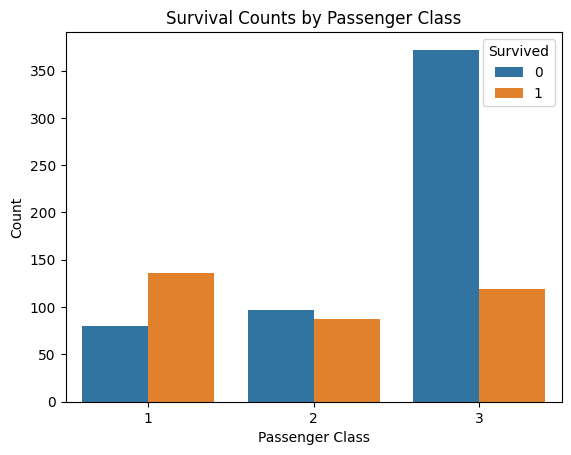

In [ ]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

6. Create a column named 'AgeClass' and insert values;
  * 0 if age <= 16
  * 1 if age <= 26
  * 2 if age <= 36
  * 3 if age <= 62
  * 4 otherwise

In [ ]:
def age_class(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

df['AgeClass'] = df['Age'].apply(age_class)

7. Now drop the column 'Age'.

In [ ]:
df.drop(columns=['Age'], inplace=True)

8. Follow step 4 and create a bar plot of Survived and Dead using the value counts amongst 'AgeClass'
groups.

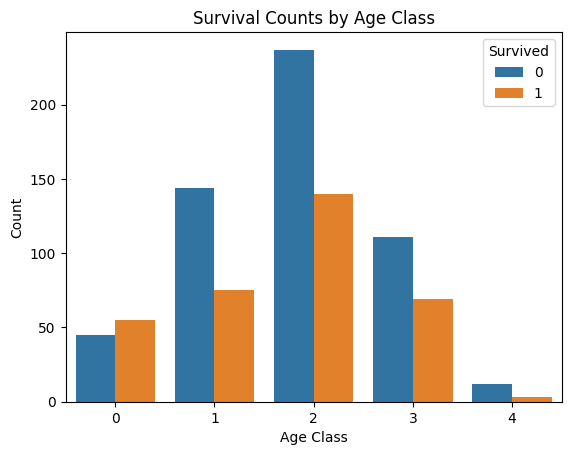

In [ ]:
sns.countplot(data=df, x='AgeClass', hue='Survived')
plt.title('Survival Counts by Age Class')
plt.xlabel('Age Class')
plt.ylabel('Count')
plt.show()

---------------------------------------Project One Done-------------------------------------

# **Project 2:** **Dataset Merging, Data Manipulation, K-Means Clustering**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

* Load both the files in different pandas dataframes.
* Make a new merged pandas dataframe on their ‘Registration Number’ column.
---



In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/msmashraful/data-analysis-project/refs/heads/main/term-test-1-result.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/msmashraful/data-analysis-project/refs/heads/main/term-test-2-result.csv")

df_merged = pd.merge(df1, df2, on=['Registration Number', 'Name'])


* Make a new column with the best term test marks for each student.
* Make a new column with the average term test marks for each student.

In [3]:
df_merged['Best Marks'] = df_merged[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
df_merged['Average Marks'] = df_merged[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)

* Drop both the columns named ‘TT-1 Marks’ and ‘TT-2 Marks’.

In [4]:
df_merged.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)

* Load the CSV file as a pandas dataframe with attendance full marks and Term Final full marks.

In [15]:
df3 = pd.read_csv("https://raw.githubusercontent.com/msmashraful/data-analysis-project/refs/heads/main/attendance%20and%20term%20final%20marks.csv")

* merge it with the latest term test dataframe.

In [16]:
df_merged_1 = pd.merge(df_merged, df3, on=['Registration Number', 'Name'])

* Create a new column named Final Marks.
- Final Marks = Term Final marks * 0.7 + Average Term Test marks + Attendance marks

In [17]:
df_merged_1['Final Marks'] = (df_merged_1['Term Final marks'] * 0.7) + df_merged_1['Average Marks'] + df_merged_1['Attendance marks']


* the latest pandas dataframe to a new CSV file named ‘final result.csv’

In [19]:
df_merged_1.to_csv("final result.csv", index=False)

* Cluster the final marks of each student using K-Means clustering algorithm.(1<K<6)

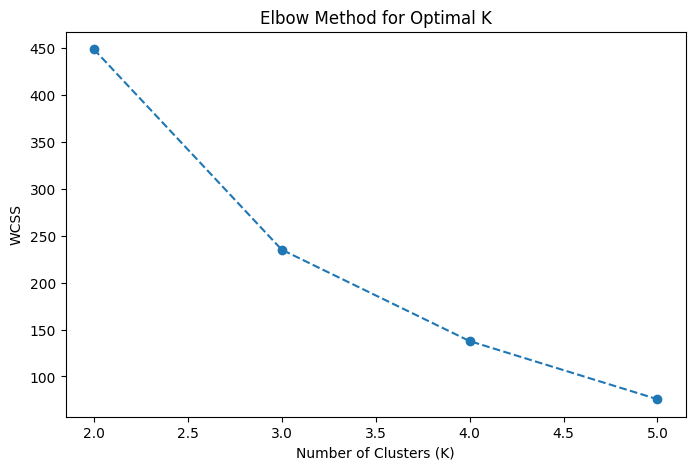

In [25]:
# Feature selection (Using only 'Final Marks' for clustering)
X = df_merged_1[['Final Marks']]

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Within-cluster sum of squares

# Plot Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(2, 6), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose K (Assume best K=3 after checking the elbow plot)
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_merged_1['Cluster'] = kmeans.fit_predict(X)  # Assign clusters



* Visualize the final clusters.

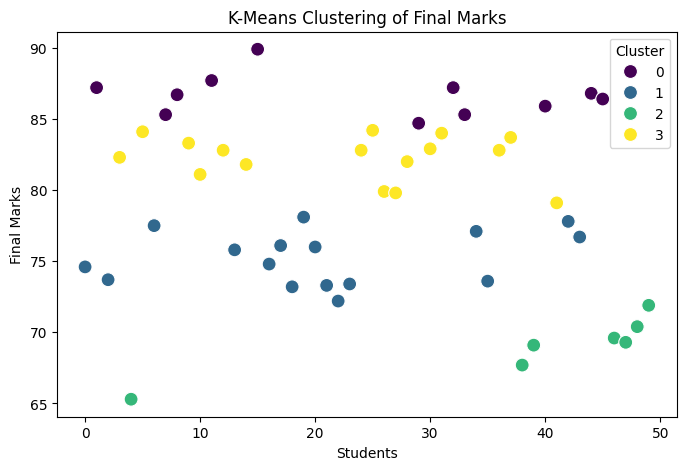

In [26]:
# Visualization of clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_merged_1.index, y=df_merged_1['Final Marks'], hue=df_merged_1['Cluster'], palette='viridis', s=100)
plt.xlabel('Students')
plt.ylabel('Final Marks')
plt.title('K-Means Clustering of Final Marks')
plt.legend(title='Cluster')
plt.show()

---------------------------------------Project Two Done-------------------------------------